In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

import nltk
import subprocess


try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')


from nltk.corpus import wordnet


nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:

description_path = "/content/drive/MyDrive/CodSoft/task 1/description.txt"
test_data_path = "/content/drive/MyDrive/CodSoft/task 1/test_data.txt"
test_data_sol_path = "/content/drive/MyDrive/CodSoft/task 1/test_data_solution.txt"
train_data_path = "/content/drive/MyDrive/CodSoft/task 1/train_data.txt"

In [24]:
# Function to read txt file
def read_txt_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()
    return content

In [18]:
description = read_txt_file(description_path)
print(description)

Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION



In [25]:


train_df = pd.read_csv(train_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
train_df.columns = ['Id','Title','Genre','Description']

print(train_df.info())
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [49]:
test_df = pd.read_csv(test_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_df.columns = ['Id','Title','Description']

print(test_df.info())
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [30]:
test_sol_df = pd.read_csv(test_data_sol_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_sol_df.columns = ['Id','Title','Genre','Description']

print(test_sol_df.info())
print(type(test_sol_df))
test_sol_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [31]:
# Getting all the classes (Genres)
y_train = train_df.Genre
print(y_train)

# print(type(y_train)) # <class 'numpy.ndarray'
# print(len(y_train)) # 27

0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


In [32]:
le = LabelEncoder()
le.fit(y_train)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [33]:
y_train = le.transform(y_train)
y_train


array([ 8, 24,  1, ...,  7,  5, 12])

<Axes: >

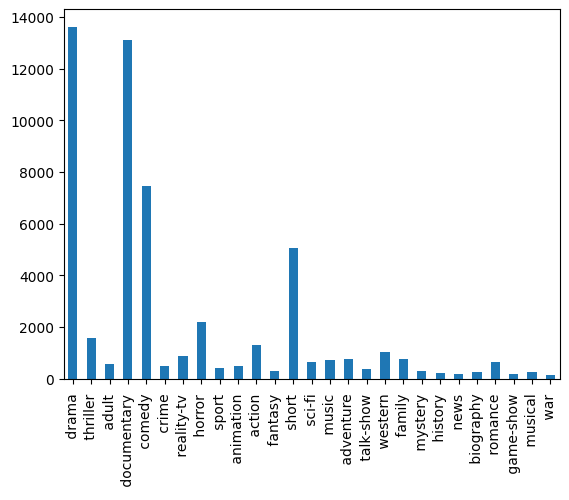

In [34]:
train_df.Genre.value_counts()[train_df.Genre.unique()].plot(kind='bar')

In [35]:
# Converting the Description column (Series type) to numpy array
desc = train_df['Description']
for _ in range(2):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.


<class 'numpy.ndarray'>


In [36]:
def extract_features(description_array):
    """
    Extract features from the description array.

    Parameters:
        description_array: Numpy array containing all the descriptions from descriptions column in dataframe
    Returns:
        X_train: Features Matrix
        features: Feature names
    """
    wordnet = WordNetLemmatizer()
    tfidf = TfidfVectorizer(max_features=7000)

    corpus =[]

    for i,des in enumerate(description_array):
        if (i%1000==0):
            print(">>> Iteration # ",i)
        var = re.sub("[^a-zA-Z]", " ", des) # just keeping the alphabets and removing special characters and numbers
        var = var.lower() # lowercasing all
        var = var.split() # splits on space to get a list of words
        var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # Lemmatizing all the words
        var = ' '.join(var)
        corpus.append(var)
    X_train = tfidf.fit_transform(corpus).toarray()
    features = tfidf.get_feature_names_out()
    return X_train,features

In [39]:
X_train, features = extract_features(desc_arr)

>>> Iteration #  0
>>> Iteration #  1000
>>> Iteration #  2000
>>> Iteration #  3000
>>> Iteration #  4000
>>> Iteration #  5000
>>> Iteration #  6000
>>> Iteration #  7000
>>> Iteration #  8000
>>> Iteration #  9000
>>> Iteration #  10000
>>> Iteration #  11000
>>> Iteration #  12000
>>> Iteration #  13000
>>> Iteration #  14000
>>> Iteration #  15000
>>> Iteration #  16000
>>> Iteration #  17000
>>> Iteration #  18000
>>> Iteration #  19000
>>> Iteration #  20000
>>> Iteration #  21000
>>> Iteration #  22000
>>> Iteration #  23000
>>> Iteration #  24000
>>> Iteration #  25000
>>> Iteration #  26000
>>> Iteration #  27000
>>> Iteration #  28000
>>> Iteration #  29000
>>> Iteration #  30000
>>> Iteration #  31000
>>> Iteration #  32000
>>> Iteration #  33000
>>> Iteration #  34000
>>> Iteration #  35000
>>> Iteration #  36000
>>> Iteration #  37000
>>> Iteration #  38000
>>> Iteration #  39000
>>> Iteration #  40000
>>> Iteration #  41000
>>> Iteration #  42000
>>> Iteration #  43000
>

In [40]:
# checking the shape of X_train and y_train
print(X_train.shape)
print(type(X_train))
print(type(features))
print(features.shape)

(54214, 7000)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7000,)


In [41]:
print("Max: ")
print(np.max(X_train))
print("Min: ")
print(np.min(X_train))

Max: 
1.0
Min: 
0.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.20,random_state=0)


In [43]:
print(X_train.shape)
print(X_test.shape)

(43371, 7000)
(10843, 7000)


In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [45]:
model.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred = model.predict(X_test)
y_pred

array([ 7,  8,  7, ..., 21,  7,  7])

In [47]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  20,    0,    0,    0,    0,   22,    0,   47,  154,    0,    0,
           0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    3,
           0,    0,    0,    0,    0],
       [   0,    3,    4,    0,    0,   42,    0,    8,   45,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    7,
           0,    0,    0,    0,    0],
       [   1,    3,   14,    0,    0,   21,    0,   41,   68,    0,    0,
           0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,   33,    0,   32,   34,    0,    0,
           0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    5,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,   41,   11,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,  697,    0,  154,  633,    

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.5246702941990224
